Imbalanced classification problems pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

In this notebook, I have explored 3 methods SMOTE, RandomUnderSampling and SMOTEEN to address this issue in cerebral stroke prediction dataset.

In [70]:

import numpy as np # linear algebra
import pandas as pd # data processing

from sklearn.impute import KNNImputer #Imputation
from sklearn.preprocessing import MinMaxScaler#scaling
from sklearn.model_selection import train_test_split#splitting

#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv


In [71]:
#load the dataset
df = pd.read_csv('/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [72]:
df.shape

(43400, 12)

In [73]:
#check for missing values
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Two columns have missing values.

In [74]:
#datatypes
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [75]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

The data is imbalanced because class label 1 has only 783 records while class label 0 has 42617 records. The ratio is 54:1.

Let's visualize this.

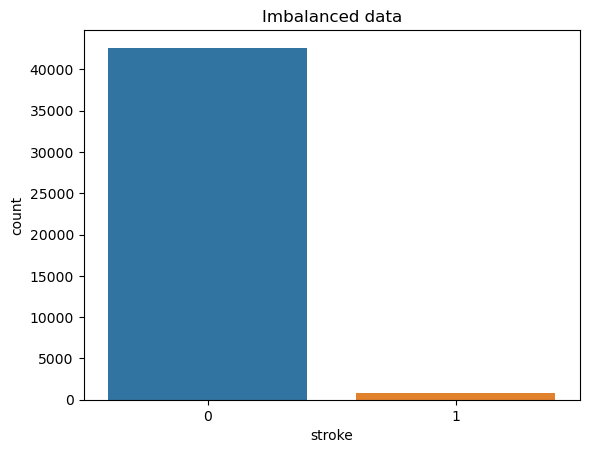

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke',data=df)
plt.title("Imbalanced data")
plt.show()

So making predictions using this data is not reliable.

**One Hot Encoding**

In [77]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [78]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head(4)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,16523,8.0,0,0,110.89,17.6,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


**Missing Value Handling**

In [79]:

imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(df)
df_new = pd.DataFrame(tab, columns=df.columns)
df_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46136.0,14.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [80]:
df_new.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [81]:
df_new.dtypes

id                                float64
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

Now the data is ready for training the ML model.

**Splitting the Features and Target**

In [82]:
X = df_new.drop('stroke',axis=1)
y = df_new['stroke']

**Scaling**

In [83]:

mm = MinMaxScaler()
X = mm.fit_transform(X)


**Splitting test and train data**

In [84]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**Model Building and Evaluation**

In [85]:
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [knn,nb,dt,rf]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12791
         1.0       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.44     12791
         1.0       0.02      0.99      0.05       229

    accuracy                           0.30     13020
   macro avg       0.51      0.64      0.24     13020
weighted avg       0.98      0.30      0.43     13020

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     12791
         1.0       0.06      0.07      0.06       229

    accuracy                           0.96     13020
   macro avg       0.52      0.

As expected the accuracy is high for all the models except GaussianNB. The models accurately predicts the 0 but not 1.
The precision is close to zero in all the above cases, which means the model failed to predict the cases where chances for cerebral stroke was actually present. So the above models are useless.

**Oversampling**

The SMOTE algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

In [86]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os,y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)


**Model Building and Evaluation**

In [87]:
knn1 = KNeighborsClassifier()
nb1 = GaussianNB()
dt1 = DecisionTreeClassifier()
rf1 = RandomForestClassifier()

models = [knn1,nb1,dt1,rf1]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     12883
         1.0       0.88      0.99      0.93     12688

    accuracy                           0.93     25571
   macro avg       0.94      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.99      0.25      0.40     12883
         1.0       0.57      1.00      0.72     12688

    accuracy                           0.62     25571
   macro avg       0.78      0.62      0.56     25571
weighted avg       0.78      0.62      0.56     25571

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     12883
         1.0       0.97      0.98      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.

After applying SMOTE technique, the precision increased. For KNN it is 0.88, for Decision Tree it is 0.97 and RandomForest it is 0.95.
So oversampling resulted in a better model that is capable of identifying the cases positive for stroke.

**UnderSampling**

In this method to create a more balanced class distribution we randomly delete the rows of the majority class. Here we are using RandomUnderSampler class for this purpose.

In [88]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=1)
X_us,y_us = us.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)


**Model Building and Evaluation**

In [89]:
knn2 = KNeighborsClassifier()
nb2 = GaussianNB()
dt2 = DecisionTreeClassifier()
rf2 = RandomForestClassifier()

models = [knn2,nb2,dt2,rf2]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70       229
         1.0       0.72      0.66      0.69       241

    accuracy                           0.69       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.70      0.69      0.69       470

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.92      0.31      0.46       229
         1.0       0.60      0.98      0.74       241

    accuracy                           0.65       470
   macro avg       0.76      0.64      0.60       470
weighted avg       0.76      0.65      0.61       470

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.70      0.67      0.69       229
         1.0       0.70      0.73      0.71       241

    accuracy                           0.70       470
   macro avg       0.70      0.

The precision is less than before but better than the one without resampling. The undersampling results in loss of data, so it is not recommended in this case.

**Combining Oversampling and Undersampling**

SMOTEEN combines SMOTE and Edited Nearest Neighbours(ENN). SMOTEEN performs upsampling and downsampling at the same time.

In [90]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

**Model Building and Evaluation**

In [91]:
knn3 = KNeighborsClassifier()
nb3 = GaussianNB()
dt3 = DecisionTreeClassifier()
rf3 = RandomForestClassifier()

models = [knn3,nb3,dt3,rf3]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     11141
         1.0       0.96      1.00      0.98     12373

    accuracy                           0.98     23514
   macro avg       0.98      0.98      0.98     23514
weighted avg       0.98      0.98      0.98     23514

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

         0.0       0.99      0.31      0.47     11141
         1.0       0.61      1.00      0.76     12373

    accuracy                           0.67     23514
   macro avg       0.80      0.65      0.61     23514
weighted avg       0.79      0.67      0.62     23514

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     11141
         1.0       0.96      0.97      0.97     12373

    accuracy                           0.96     23514
   macro avg       0.96      0.

The precision for this case is the best. For KNN it is 0.96, Decision Tree it is 0.97, Random Forest it is 0.98.It is Impressive!!

**End Note :** For the Cerebral Stroke Imbalanced data we could make a better model using resampling techniques.